In [13]:
import pandas as pd

# Load the third dataset
df_league = pd.read_csv('ScoreSight_ML_Season_LeagueWinner_Champion.csv')

# Unwanted Columns List
unwanted_cols = ['season','team','matches_played','points_per_game','target_league_position', 'target_top_4', 'target_top_6', 'target_relegated']
df_league_cleaned = df_league.drop(columns=unwanted_cols, errors='ignore')

# Required Feature List
print("\nThis is the NEW, CLEANED dataframe:")
df_league_cleaned.head()


This is the NEW, CLEANED dataframe:


,wins,draws,losses,goals_scored,goals_conceded,goal_difference,target_total_points,target_champion
0,11,9,18,45.0,67.0,-22.0,42,0
1,9,7,22,39.0,67.0,-28.0,34,0
2,19,9,10,49.0,35.0,14.0,66,0
3,12,14,12,59.0,53.0,6.0,50,0
4,11,14,13,59.0,55.0,4.0,47,0


In [14]:
# Exporting cleaned dataset to Excel Sheet
df_league_cleaned.to_excel('cleaned_league_data.xlsx', index=False)

In [15]:
#Checking for NULL Values
print(df_league_cleaned.isnull().sum())

wins                   0
draws                  0
losses                 0
goals_scored           0
goals_conceded         0
goal_difference        0
target_total_points    0
target_champion        0
dtype: int64


In [16]:
# Check for any duplicate Rows
league_dupes = df_league_cleaned.duplicated().sum()
print(f"League Data has: {league_dupes} duplicate rows")

League Data has: 0 duplicate rows


In [17]:
# Checking For Outliers
print("\n--- League Data (Outlier Check) ---")
df_league_cleaned.describe()


--- League Data (Outlier Check) ---


,wins,draws,losses,goals_scored,goals_conceded,goal_difference,target_total_points,target_champion
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,14.544444,8.911111,14.544444,53.833333,53.833333,0.000000,52.544444,0.050000
std,6.297399,2.874058,6.018892,17.635509,13.931396,28.486006,18.168769,0.218553
min,2.000000,2.000000,1.000000,20.000000,22.000000,-69.000000,12.000000,0.000000
25%,10.000000,7.000000,10.750000,40.000000,44.750000,-19.250000,40.000000,0.000000
50%,13.000000,9.000000,15.000000,51.000000,54.000000,-2.500000,50.000000,0.000000
75%,19.000000,11.000000,18.000000,65.250000,63.000000,15.250000,66.000000,0.000000
max,32.000000,15.000000,30.000000,106.000000,104.000000,79.000000,100.000000,1.000000


Plotting boxplots for all 8 numeric columns in df_league:



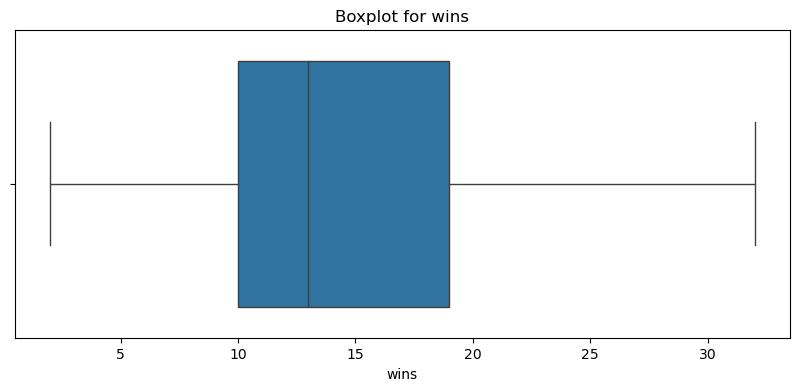

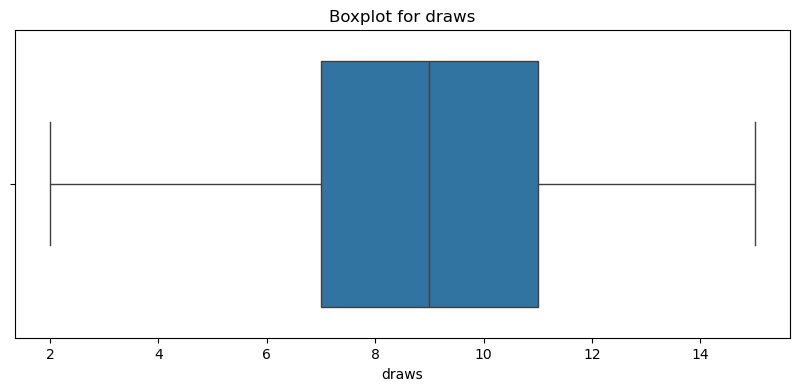

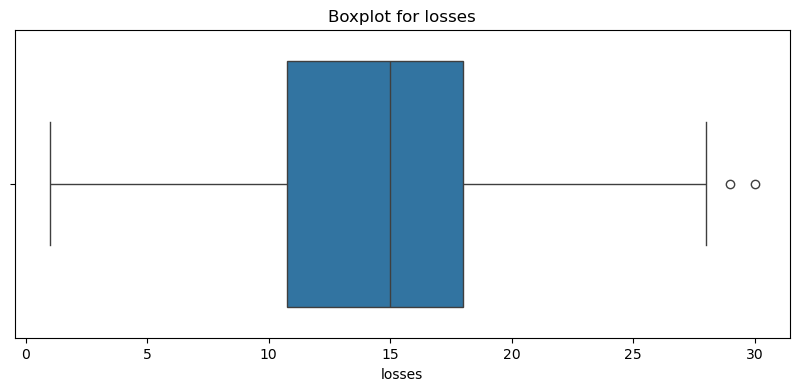

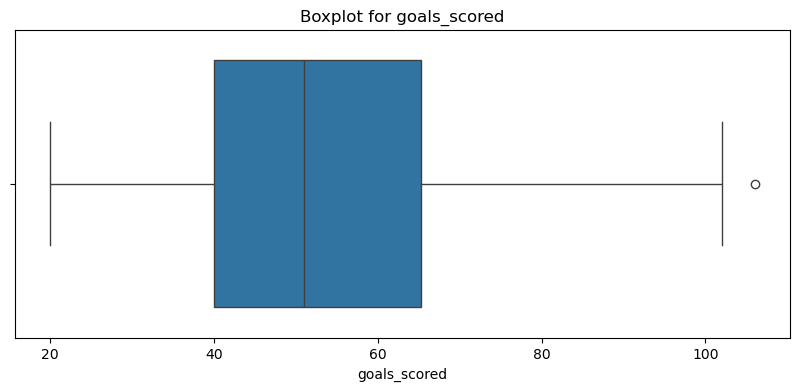

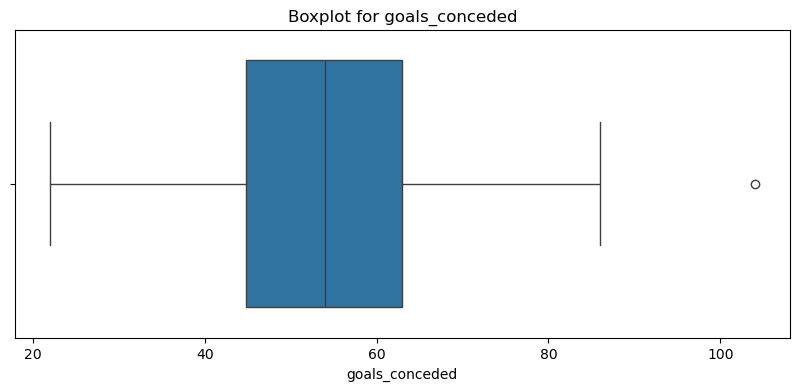

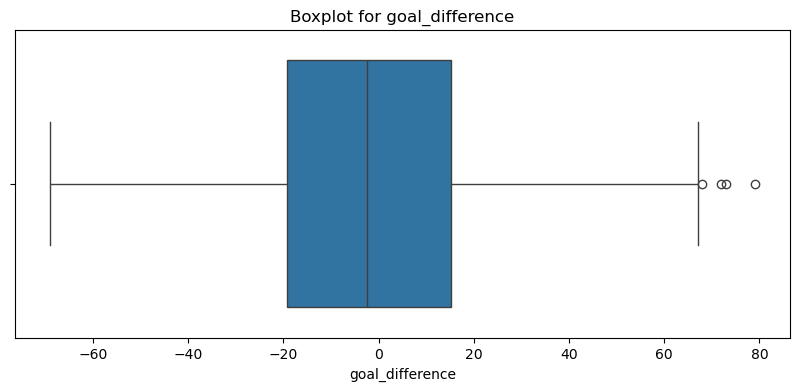

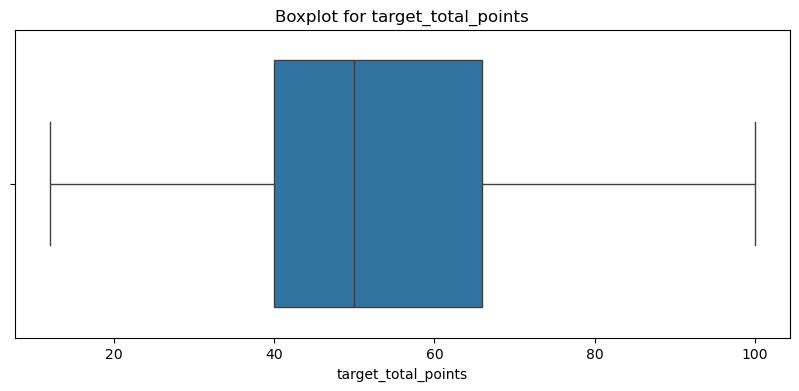

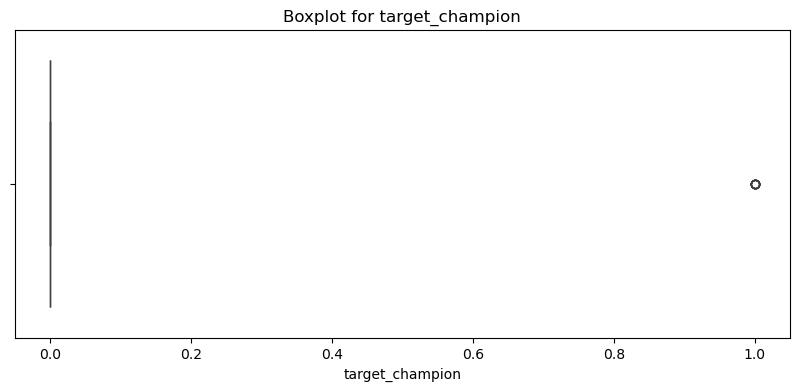


--- All numeric columns have been plotted. ---


In [18]:
# Plotting BoxPlots for all the Numerical Features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get a list of all columns that are numbers (int64 or float64)
numeric_cols = df_league_cleaned.select_dtypes(include=[np.number]).columns

print(f"Plotting boxplots for all {len(numeric_cols)} numeric columns in df_league:\n")

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_league_cleaned[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

print("\n--- All numeric columns have been plotted. ---")

In [19]:
# Removing Outliers
import pandas as pd
import numpy as np

def remove_outliers_iqr_targeted(df, columns_to_check):
    """
    Removes outliers from a DataFrame based on the IQR rule,
    but only for the columns specified in columns_to_check.
    A row is kept ONLY if it is within the IQR bounds for ALL specified columns.
    """
    df_original = df.copy()
    df_filtered = df.copy()
    
    print(f"Original shape: {df_original.shape}")
    
    for col in columns_to_check:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        # Keep rows that are WITHIN the bounds for this column
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & 
                                  (df_filtered[col] <= upper_bound)]
    
    # Identify removed rows by checking which indices are missing from df_filtered
    df_removed = df_original.drop(df_filtered.index)

    print(f"\nNew shape after trimming: {df_filtered.shape}")
    print(f"Total rows removed: {len(df_removed)}")
    
    return df_filtered, df_removed

# --- Main script ---
print("--- Processing League Data ---")
try:
    # Load the data
    df_league_cleaned = pd.read_excel("cleaned_league_data.xlsx")
    print(f"Loaded data: {df_league_cleaned.shape}")

    # Define columns to check for outliers
    # We choose the main performance metrics
    cols_to_trim_league = [
        'wins',
        'draws',
        'losses',
        'goals_scored',
        'goals_conceded',
        'goal_difference'
    ]
    
    # Unpack return values
    df_league_trimmed, df_outliers = remove_outliers_iqr_targeted(df_league_cleaned, cols_to_trim_league)
    
    # Save to Excel
    df_league_trimmed.to_excel("league_data_trimmed_outliers.xlsx", index=False)
    df_outliers.to_excel("league_data_REMOVED_outliers.xlsx", index=False)
    
    print("\nProcessing complete.")
    print("1. Clean data saved to: league_data_trimmed_outliers.xlsx")
    print("2. Removed rows saved to: league_data_REMOVED_outliers.xlsx")

except FileNotFoundError:
    print("Error: 'cleaned_league_data.xlsx' not found. Please run the cleaning cell above first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Processing League Data ---
Loaded data: (180, 8)
Original shape: (180, 8)

New shape after trimming: (171, 8)
Total rows removed: 9

Processing complete.
1. Clean data saved to: league_data_trimmed_outliers.xlsx
2. Removed rows saved to: league_data_REMOVED_outliers.xlsx


--- Plotting Boxplots for League Winner Data (Outliers Removed) ---
Loaded 'league_data_trimmed_outliers.xlsx': (171, 8)
Plotting boxplots for all 8 numeric columns:



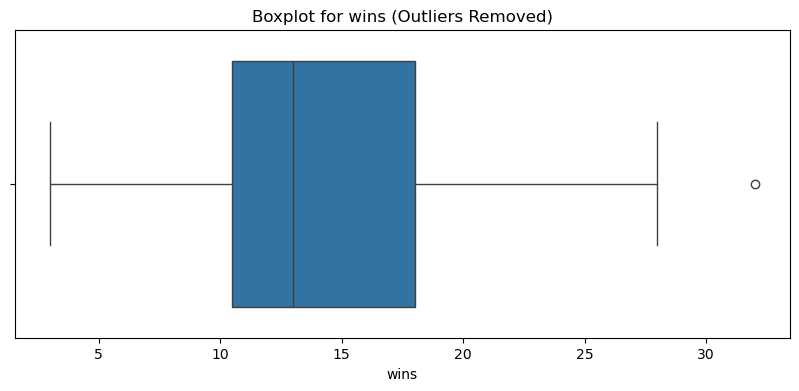

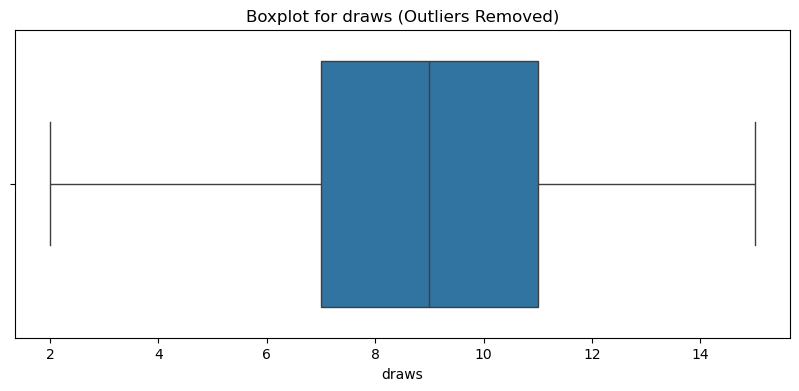

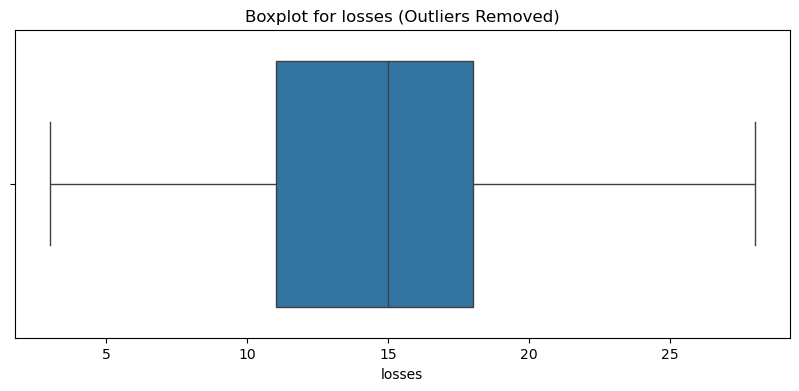

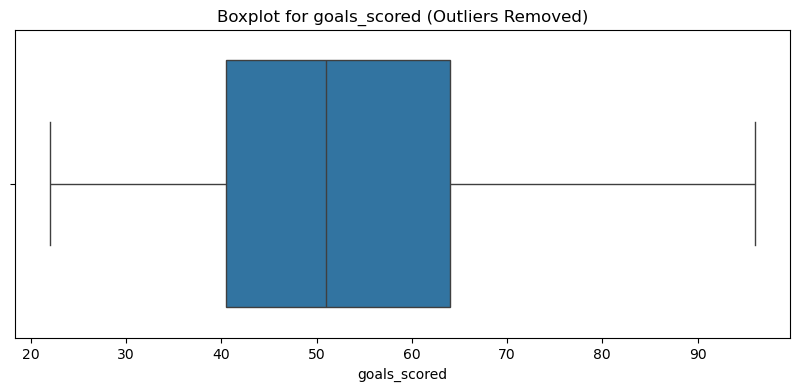

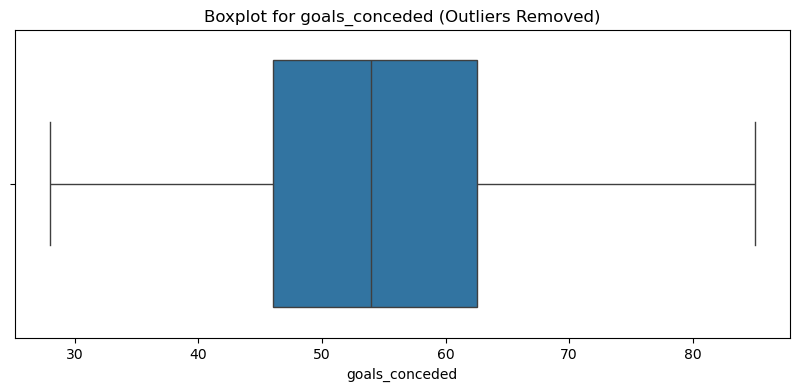

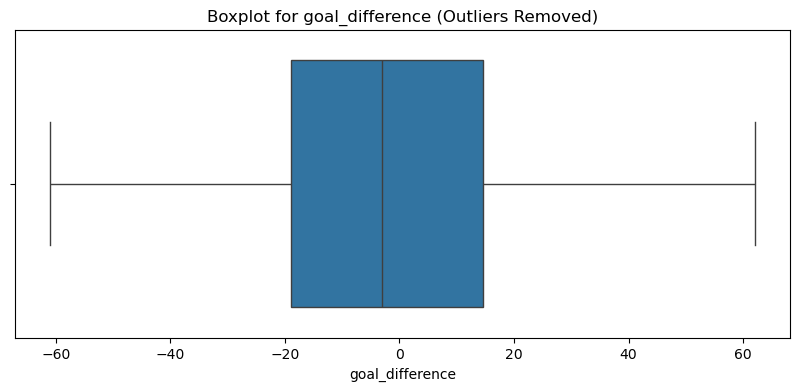

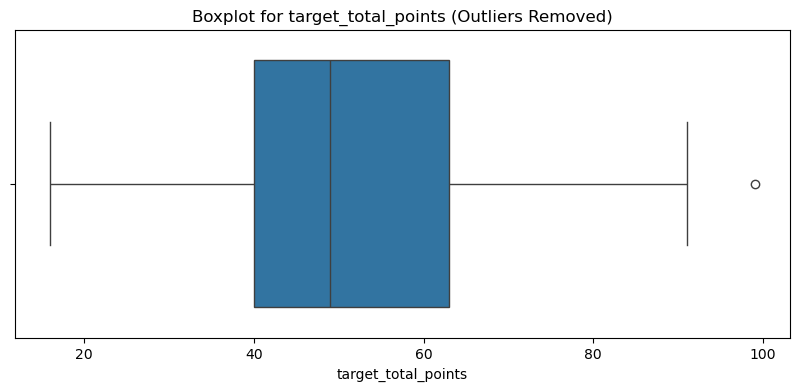

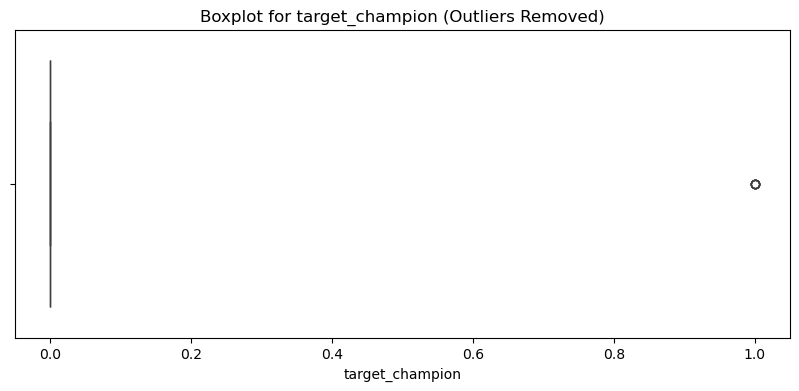


--- All numeric columns have been plotted. ---


In [22]:
# Plotting BoxPlots for all the Numerical Features after removing outliers (League Data)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Plotting Boxplots for League Winner Data (Outliers Removed) ---")

try:
    # 1. Load the trimmed league data
    # Make sure this file exists (run the outlier removal script first!)
    df_league_trimmed = pd.read_excel("league_data_trimmed_outliers.xlsx")
    print(f"Loaded 'league_data_trimmed_outliers.xlsx': {df_league_trimmed.shape}")

    # 2. Get a list of all columns that are numbers (int64 or float64)
    numeric_cols = df_league_trimmed.select_dtypes(include=[np.number]).columns

    print(f"Plotting boxplots for all {len(numeric_cols)} numeric columns:\n")
    
    for col in numeric_cols:
        plt.figure(figsize=(10, 4))
        # We use the trimmed dataframe here
        sns.boxplot(x=df_league_trimmed[col])
        plt.title(f'Boxplot for {col} (Outliers Removed)')
        plt.xlabel(col)
        plt.show()
        
    print("\n--- All numeric columns have been plotted. ---")

except FileNotFoundError:
    print("Error: 'league_data_trimmed_outliers.xlsx' not found.")
    print("Please ensure you have run the outlier removal script (process_league_data.py) first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- League Data: Relationship Analysis ---
Loaded 'league_data_trimmed_outliers.xlsx': (171, 8)

--- Correlation Matrix (Trimmed League Data) ---


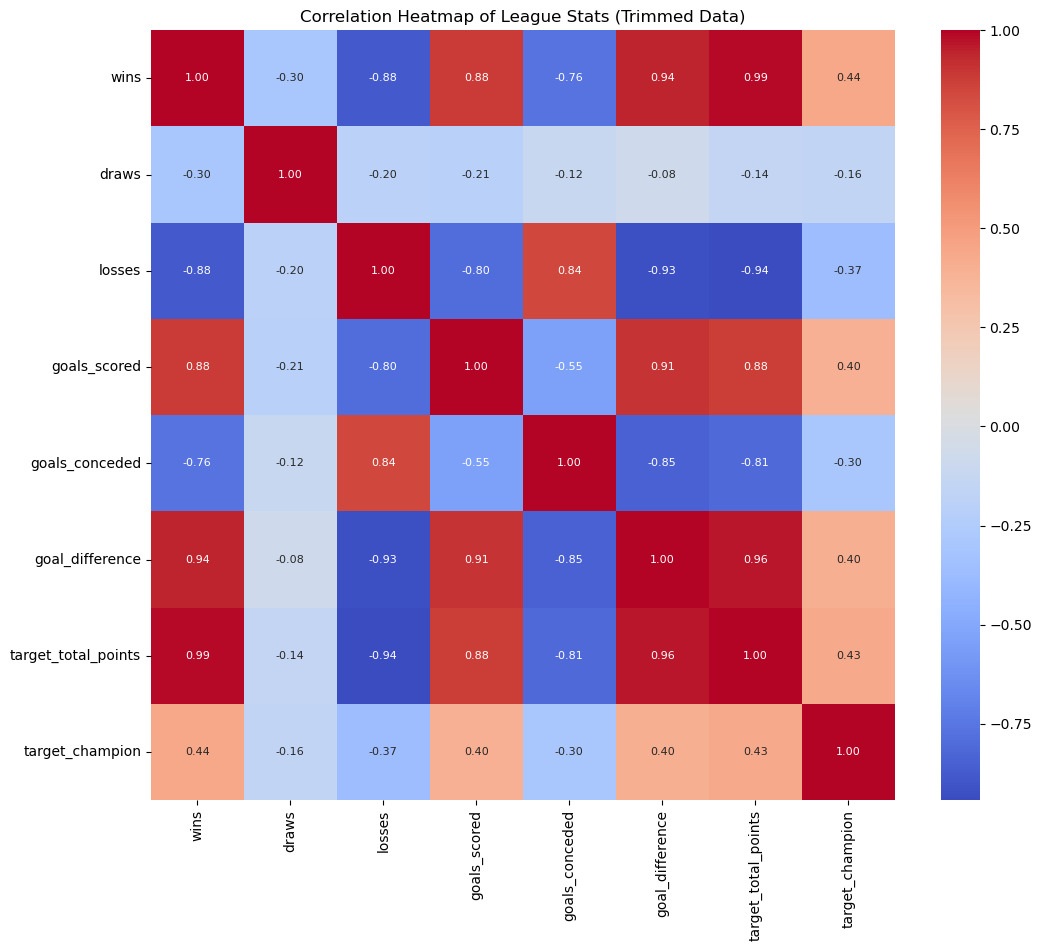


--- Key Insights: What correlates with Winning? ---

Top 5 Features Correlated with 'target_total_points':
target_total_points    1.000000
wins                   0.986794
goal_difference        0.962257
goals_scored           0.875662
target_champion        0.431099
draws                 -0.140570
Name: target_total_points, dtype: float64

Top 5 Features Correlated with 'target_champion':
target_champion        1.000000
wins                   0.441414
target_total_points    0.431099
goal_difference        0.401381
goals_scored           0.398201
draws                 -0.158446
Name: target_champion, dtype: float64

--- League relationship analysis complete ---


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Main script ---
print("--- League Data: Relationship Analysis ---")

try:
    # 1. Load the trimmed data
    # Make sure this file exists from your previous step (process_league_data.py)
    df_league_trimmed = pd.read_excel("league_data_trimmed_outliers.xlsx")
    print(f"Loaded 'league_data_trimmed_outliers.xlsx': {df_league_trimmed.shape}")

    # 2. Correlation Matrix
    print("\n--- Correlation Matrix (Trimmed League Data) ---")
    
    # Select only numeric columns for correlation
    numeric_cols = df_league_trimmed.select_dtypes(include=[np.number])
    corr_matrix = numeric_cols.corr()
    
    # Create a heatmap to visualize the correlation
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                annot_kws={"size": 8})
    plt.title('Correlation Heatmap of League Stats (Trimmed Data)')
    plt.show()
    
    # 3. Top Correlations for Targets
    print("\n--- Key Insights: What correlates with Winning? ---")
    
    # Check 'target_total_points' correlations
    print("\nTop 5 Features Correlated with 'target_total_points':")
    # We sort descending to see the strongest positive correlations first
    print(corr_matrix['target_total_points'].sort_values(ascending=False).head(6)) 

    # Check 'target_champion' correlations
    print("\nTop 5 Features Correlated with 'target_champion':")
    print(corr_matrix['target_champion'].sort_values(ascending=False).head(6))

    print("\n--- League relationship analysis complete ---")

except FileNotFoundError:
    print("Error: 'league_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_league_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [27]:
#Save to Excel File
df_league_trimmed.to_excel('league_data_trimmed_outliers.xlsx', index=False)

--- Training Classification Models for 'League Champion' (Leakage Removed) ---
Loaded 'league_data_trimmed_outliers.xlsx': (171, 8)

Dropping leaky columns: ['target_champion', 'target_total_points', 'wins', 'draws', 'losses']
Features remaining: ['goals_scored', 'goals_conceded', 'goal_difference']

  TRAINING 4 MODELS...
Test Set Size: 35 teams
Champions in Test Set: 1
Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
Training SVM (Linear)...

Displaying Confusion Matrices...


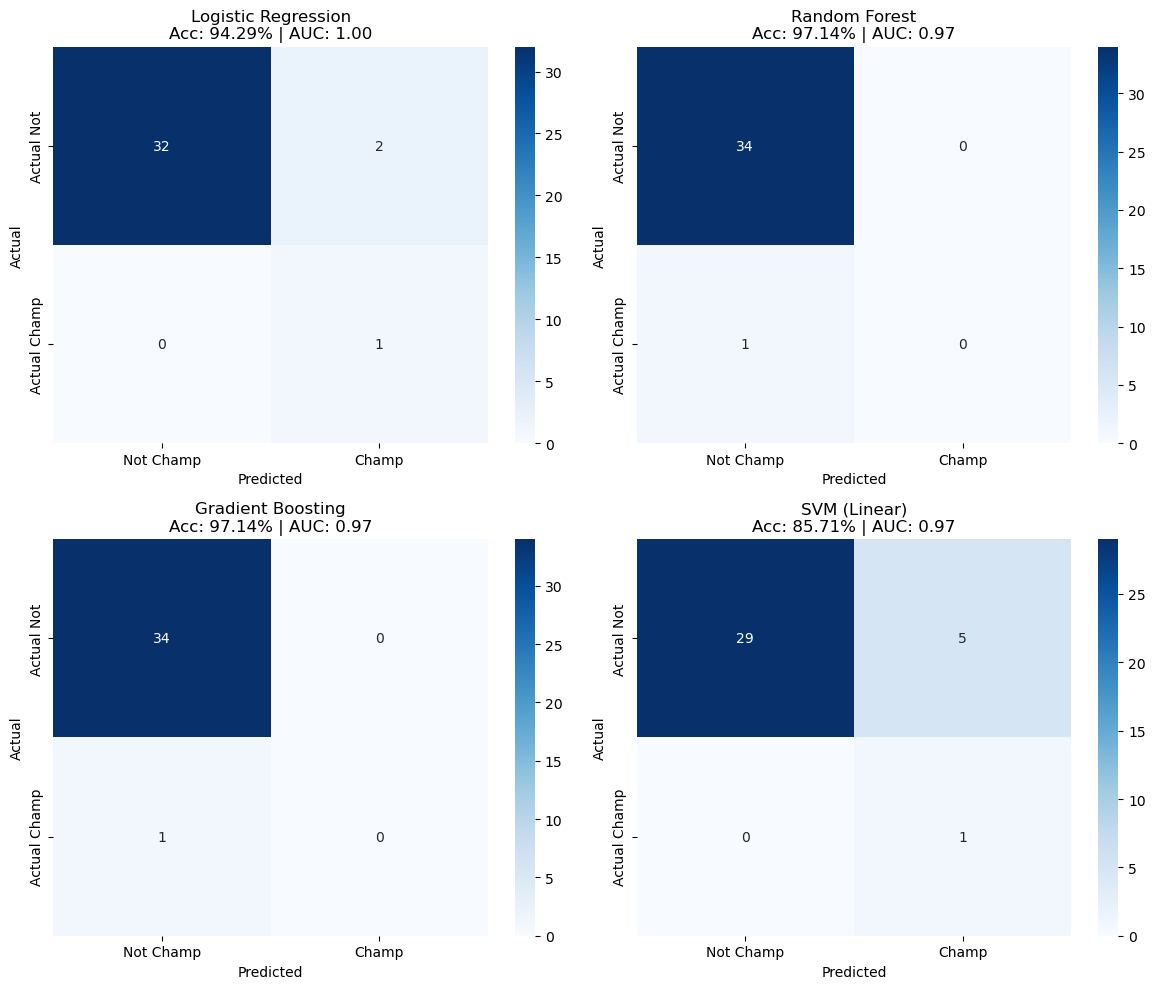


  GENERATING ROC CURVES
Displaying ROC Curves...


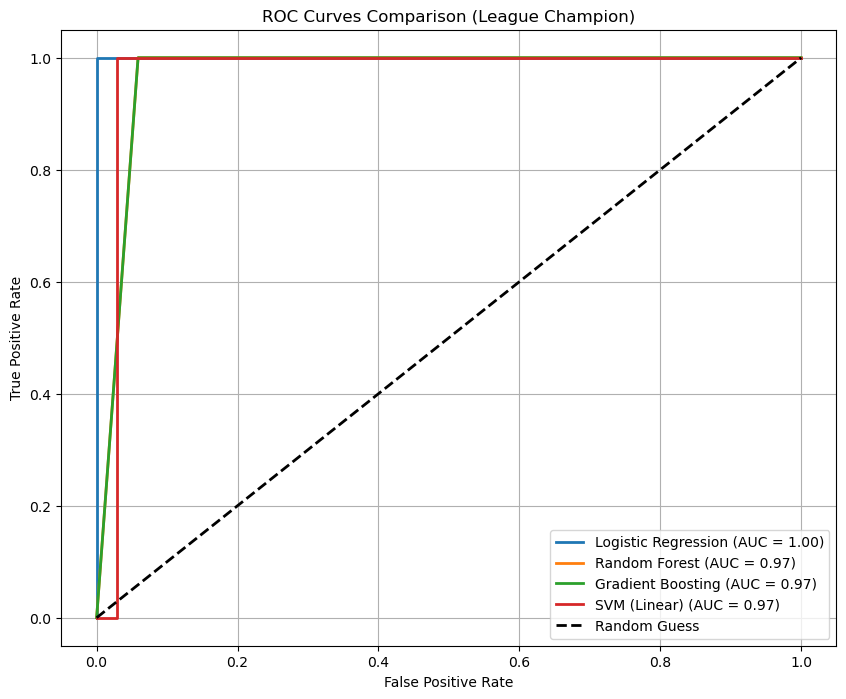


--- Final Championship Leaderboard (Sorted by AUC) ---
              Model  Test Accuracy  Test ROC-AUC
Logistic Regression       0.942857      1.000000
      Random Forest       0.971429      0.970588
  Gradient Boosting       0.971429      0.970588
       SVM (Linear)       0.857143      0.970588


In [36]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# --- Main Script ---
print("--- Training Classification Models for 'League Champion' (Leakage Removed) ---")

try:
    # 1. Load Data
    df = pd.read_excel("league_data_trimmed_outliers.xlsx")
    print(f"Loaded 'league_data_trimmed_outliers.xlsx': {df.shape}")

    # 2. Feature Engineering
    target = 'target_champion'
    y = df[target]
    
    # --- REMOVE LEAKAGE ---
    # We drop columns that give away the answer directly.
    # We keep only performance metrics like goals and goal difference.
    leaky_cols = [
        target, 
        'target_total_points',   # Points determine the champion
        'points_per_game',       # Derived from points
        'target_league_position',# Rank 1 = Champion
        'target_top_4', 
        'target_top_6', 
        'target_relegated',
        'wins',                  # Strongly correlated with points
        'draws',
        'losses'
    ]
    
    # Only drop columns that actually exist in your dataframe
    cols_to_drop = [c for c in leaky_cols if c in df.columns]
    print(f"\nDropping leaky columns: {cols_to_drop}")
    
    X = df.drop(columns=cols_to_drop)
    print(f"Features remaining: {list(X.columns)}")
    
    # Identify columns
    categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
    numeric_cols = [col for col in X.columns if X[col].dtype != 'object']

    # 3. Setup Preprocessing Pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
        ]
    )

    # 4. Define Models
    # We use class_weight='balanced' for Logistic/RF/SVM to handle the rare champion class
    models = {
        "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
        "SVM (Linear)": SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
    }

    # 5. Training & Evaluation Loop
    # Stratify is critical here because there are so few champions!
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    model_results = []
    
    # --- PLOT 1: CONFUSION MATRIX GRID ---
    num_models = len(models)
    rows = (num_models // 2) + (num_models % 2) # grid layout
    fig_cm, axes_cm = plt.subplots(rows, 2, figsize=(12, 5 * rows))
    axes_cm = axes_cm.flatten()
    
    # Store ROC data
    roc_data = []

    print(f"\n{'='*40}")
    print(f"  TRAINING {len(models)} MODELS...")
    print(f"{'='*40}")
    print(f"Test Set Size: {len(y_test)} teams")
    print(f"Champions in Test Set: {y_test.sum()}")

    for i, (name, model) in enumerate(models.items()):
        print(f"Training {name}...")
        
        # Pipeline
        pipe = Pipeline([('preprocessor', preprocessor), ('classifier', model)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        
        # Metrics
        acc = accuracy_score(y_test, y_pred)
        try:
            y_proba = pipe.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
            roc_data.append((name, y_test, y_proba, auc))
        except:
            auc = 0.5
        
        model_results.append({"Model": name, "Test Accuracy": acc, "Test ROC-AUC": auc})
        
        # Plot Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes_cm[i],
                    xticklabels=['Not Champ', 'Champ'], yticklabels=['Actual Not', 'Actual Champ'])
        axes_cm[i].set_title(f"{name}\nAcc: {acc:.2%} | AUC: {auc:.2f}")
        axes_cm[i].set_ylabel('Actual')
        axes_cm[i].set_xlabel('Predicted')

    # Hide unused subplots
    for j in range(i + 1, len(axes_cm)):
        axes_cm[j].axis('off')
    
    plt.tight_layout()
    print("\nDisplaying Confusion Matrices...")
    plt.show()

    # --- PLOT 2: ROC CURVES (SINGLE PLOT) ---
    print(f"\n{'='*40}")
    print(f"  GENERATING ROC CURVES")
    print(f"{'='*40}")
    
    plt.figure(figsize=(10, 8))
    for name, y_true, y_score, auc in roc_data:
        fpr, tpr, _ = roc_curve(y_true, y_score)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison (League Champion)')
    plt.legend(loc="lower right")
    plt.grid(True)
    print("Displaying ROC Curves...")
    plt.show()
    
    # Leaderboard
    results_df = pd.DataFrame(model_results).sort_values(by="Test ROC-AUC", ascending=False)
    print(f"\n--- Final Championship Leaderboard (Sorted by AUC) ---")
    print(results_df.to_string(index=False))

except FileNotFoundError:
    print("Error: 'league_data_trimmed_outliers.xlsx' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Training Regression Models for 'Total Points' (Leakage Removed) ---
Loaded 'league_data_trimmed_outliers.xlsx': (171, 8)

Dropping leaky columns: ['target_total_points', 'target_champion', 'wins', 'draws', 'losses']
Features remaining: ['goals_scored', 'goals_conceded', 'goal_difference']

  TRAINING 3 REGRESSION MODELS...
Training Linear Regression...
Training Random Forest...
Training Gradient Boosting...


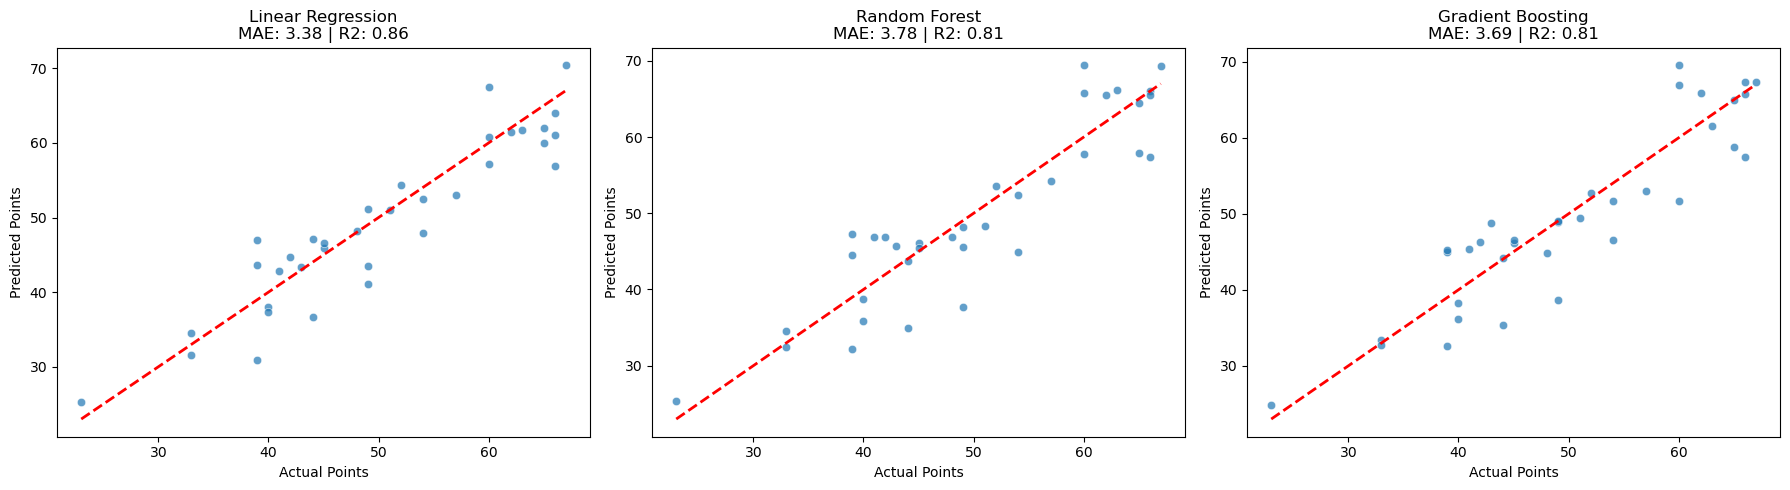


--- Final Leaderboard for Total Points (Sorted by Lowest Error) ---
            Model      MAE     RMSE  R2 Score
Linear Regression 3.383534 4.238304  0.857070
Gradient Boosting 3.694533 4.845524  0.813181
    Random Forest 3.781829 4.907820  0.808347


In [34]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Main Script ---
print("--- Training Regression Models for 'Total Points' (Leakage Removed) ---")

try:
    # 1. Load Data
    df = pd.read_excel("league_data_trimmed_outliers.xlsx")
    print(f"Loaded 'league_data_trimmed_outliers.xlsx': {df.shape}")

    # 2. Feature Engineering
    target = 'target_total_points'
    y = df[target]
    
    # --- REMOVE LEAKAGE ---
    # We drop columns that are mathematically linked to the points total.
    leaky_cols = [
        target, 
        'target_champion', 
        'wins', 
        'draws', 
        'losses', 
        'points_per_game',
        'target_league_position',
        'target_top_4',
        'target_top_6',
        'target_relegated'
    ]
    
    # Only drop columns that actually exist in your dataframe
    cols_to_drop = [c for c in leaky_cols if c in df.columns]
    print(f"\nDropping leaky columns: {cols_to_drop}")
    
    X = df.drop(columns=cols_to_drop)
    print(f"Features remaining: {list(X.columns)}")
    
    # Identify columns
    categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
    numeric_cols = [col for col in X.columns if X[col].dtype != 'object']

    # 3. Setup Preprocessing Pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
        ]
    )

    # 4. Define Models
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
    }

    # 5. Training & Evaluation Loop
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model_results = []
    
    # Setup Plot Grid
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    axes = axes.flatten()

    print(f"\n{'='*40}")
    print(f"  TRAINING {len(models)} REGRESSION MODELS...")
    print(f"{'='*40}")

    for i, (name, model) in enumerate(models.items()):
        print(f"Training {name}...")
        
        # Create Pipeline
        pipe = Pipeline([('preprocessor', preprocessor), ('regressor', model)])
        
        # Fit
        pipe.fit(X_train, y_train)
        
        # Predict
        y_pred = pipe.predict(X_test)
        
        # Metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
            
        model_results.append({
            "Model": name,
            "MAE": mae,
            "RMSE": rmse,
            "R2 Score": r2
        })
        
        # Visualization: Actual vs Predicted
        sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, ax=axes[i])
        # Perfect prediction line
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[i].set_xlabel("Actual Points")
        axes[i].set_ylabel("Predicted Points")
        axes[i].set_title(f"{name}\nMAE: {mae:.2f} | R2: {r2:.2f}")

    plt.tight_layout()
    plt.show()
    
    # Print Final Leaderboard
    results_df = pd.DataFrame(model_results).sort_values(by="MAE", ascending=True)
    print(f"\n--- Final Leaderboard for Total Points (Sorted by Lowest Error) ---")
    print(results_df.to_string(index=False))

except FileNotFoundError:
    print("Error: 'league_data_trimmed_outliers.xlsx' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")